## Boys and Girls Problem
A couple beginning a family decides to keep having children until they have at least one of either sex. Estimate the average number of children they will have via simulation using a while loop. Also estimate the most common outcome (record the frequency counts for 2, 3, and 4 children, and also for 5 and above). 

Make the probability $\texttt{p}$ of having a girl something that can be adjusted by writing a function that accepts a probability $\texttt{p}$ and a number of simulations to conduct $\texttt{N}$ and returns the average number of children.

### Note on random numers
We are going to need a random number that is uniformly distributed between 0 and 1. This is done by importing the $\texttt{rand}$ function from $\texttt{numpy.random}$. For example, we can print 10 such randoms and use them to determine a baby's gender as follows.

In [1]:
from numpy.random import rand
from __future__ import print_function
i = 0  # Just a counter for the while loop
p = .5 # Below this value will be a girl, above or equal - boy
while (i<10):
    r = rand()
    print("%6.5f  ->  "%r,end='')
    if r < p:
        print("Girl")
    else: 
        print("Boy")
    i+=1   # short hand for i = i + 1

0.20938  ->  Girl
0.78181  ->  Boy
0.71753  ->  Boy
0.47837  ->  Girl
0.02517  ->  Girl
0.18150  ->  Girl
0.24932  ->  Girl
0.89468  ->  Boy
0.33571  ->  Girl
0.03272  ->  Girl


### Write the function
In the cell below, write a function to return the average number of children. Call it $\texttt{boys_and_girls}$. The function should accept parameters for the number of simulations, $\texttt{N}$ and the probability of having a girl, $\texttt{p}$. 

Note that there will be an outer loop on the number of simulations, $\texttt{N}$, and an inner loop that keeps producing randomly sexed childrenuntil there is one boy and one girl. The function returns the total number of children divided by the number of simulations.

In [2]:
def boys_and_girls(N,p): #N is number simulations, p is probability of havign girl
    c_count=0 #the number of children total, starts at zero
    for i in range(N):
        b_count,g_count=0,0 #counting boys and girls, multiple assignments
        while not (b_count>=1 and g_count>=1):#keeps making babies until we have 1 boy and 1 girl
            baby_val=rand() #we get a random number between 0 and 1
            if baby_val<p:
                g_count+=1 #if the baby value is less than 0.5, we raise teh girl count
                c_count+=1 #raise the child coutn everytiem a baby made
            else: #otherwise, the baby is a boy
                b_count+=1 #and so we raise the boy count
                c_count+=1
    P_C=c_count/N #this is the average number of chidlren needed
    return P_C #this returns the probable numebr of kids needed to get one boy and one girl


### Test the function

Now call the function with $\texttt{p=}$  0.5 and $\texttt{N=}$  1 million simulations (learn to write this in scientific notation, or $\texttt{1e6}$). Report the answer. Also call the function with p=0.49, a more realistic probability for having a girl.

In [3]:
print("The average number of kids needed is: %6.5f" %boys_and_girls(10**6,0.5))
print("The average number of kids needed is: %6.5f" %boys_and_girls(10**6,0.49))

The average number of kids needed is: 3.00011
The average number of kids needed is: 3.00154


### Revision

Alter your original function to accept a third parameter, $\texttt{number_of_children}$. When the function completes, have it report the probability of a family that uses this strategy having specified number children. For example, if you pass $\texttt{number_of_children}$ is 7 to the function, it should return the percentage of simulations that give 7 children before a child of each gender is born. Use your modified function to create a table reporting results for the probability of having between 2 an 9 children.

In [4]:
def boys_and_girls_v2(N,p,ch): #ch is num kids, edit so it shows the proper/intended question
    got_it=0 #number of times b_count+g_count==ch
    for i in range(N):
        b_count,g_count=0,0 #counting boys and girls
        while not (b_count>=1 and g_count>=1):#keeps making babies until we have 1 boy and 1 girl
            baby_val=rand() #we get a random number between 0 and 1
            if baby_val<p:
                g_count+=1 #if the baby value is less than 0.5, we raise teh girl count
            else: #otherwise, the baby is a boy
                b_count+=1 #and so we raise the boy count
        if b_count+g_count==ch: #we check to see if numbe of boys and girls equals eql num kids
            got_it+=1
        else:
            got_it+=0
    P_G=got_it/N
    return P_G #this returns the probability of having that many kids until one girl and one boy

In [5]:
print("Children       Probability")
for i in range(2,10):
    n_kids=boys_and_girls_v2(10**6,0.49,i)
    print("%1.1f            %f" %(i,n_kids))

Children       Probability
2.0            0.499725
3.0            0.249517
4.0            0.124863
5.0            0.062575
6.0            0.031563
7.0            0.015647
8.0            0.007878
9.0            0.003884


### Comments
Did the value of p make much of a difference? Can you reach any conclusions about the wisdom of this strategy? How many children would you expect to have? How many children might you were

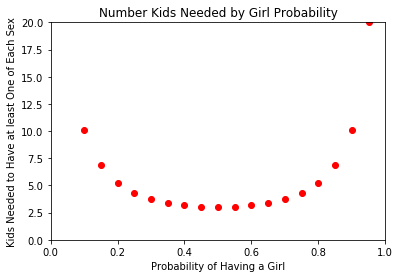

In [6]:
import matplotlib.pyplot as plt #used for plotting

#our inputs and tracking lists
p_range=[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
pr_x=[] #our empty list of x-values
pr_y=[] #our empty list of y-values

#our loop to get everythign done
for i in range(len(p_range)):
    pr_x+=[p_range[i]] #records the input from p_range in a list
    out=boys_and_girls(10**6,p_range[i]) #calculates average number of children for given input
    pr_y+=[out] #adds the generated output to a list

#makign data understandable as a graph
plt.plot(pr_x,pr_y,'ro') #specifies our data points
plt.axis([0,1,0,20]) #xmin, xmax, ymin,ymax
plt.title("Number Kids Needed by Girl Probability") #graph title
plt.xlabel("Probability of Having a Girl") #x-axis label
plt.ylabel("Kids Needed to Have at least One of Each Sex") #y-axis label
plt.show() #shows our plot